## Klasifikasi Satu Kelas dan Multi Kelas
Di pertemuan yang lalu kita sudah mempelajari alur kerja pembuatan model pembelajaran mesin. Secara lebih lanjut, model yang sudah kita pelajari adalah model untuk menebak nilai numerik, yaitu regresi linear. Di dalam pertemuan kali ini kita akan mempelajari fungsi lain pembelajaran mesin untuk melakukan klasifikasi untuk menebak kelas. Pada dasarnya, baik klasifikasi dan regresi ini termasuk di dalam kategori *supervised learning* di mana harus ada pasangan input dan output yang sudah tersedia untuk selanjutnya dibuat model

Secara lebih detail, di dalam modul ini kita akan mempelajari:
1. Klasifikasi satu kelas
    * Studi kasus: pemasangan iklan
2. Klasifikasi multi kelas
    * Studi kasus: deteksi angka

### 1. Klasifikasi satu kelas
**Studi kasus: pemasangan iklan**
<br>
Di dalam studi kasus ini kita akan melakukan klasifikasi apakah seseorang akan membeli suatu produk berdasarkan jenis kelamin, pendapatan tahunan, dan umur. Selain itu dataset dipastikan sudah melewati proses preprocessing dan dipastikan tidak ada nilai yang kosong

**Memanggil dataset**
<br>
Sebelum melakukan klasifikasi, pertama kita harus mendownload dataset dahulu di: https://drive.google.com/file/d/1GUs_A15PNHnPhBn-k4MlZmpVY0t3vip7/view?usp=sharing

In [19]:
# Memanggil dataset
import pandas as pd
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
# Mengecek tipe data
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [25]:
# Menghitung jumlah data
len(dataset)

400

Berikut ini adalah penjelasan kolom-kolom di atas:
* **User ID**: kode unik masing-masing pelanggan
* **Gender**: jenis kelamin pelanggan
* **Age**: umur pelanggan
* **EstimatedSalary**: perkiraan gaji tahunan pelanggan (dalam USD)
* **Purchased**: nilai target, 0 = pelanggan tidak membeli produk dan 1 = pelanggan membeli produk

**Menentukan input dan output**
<br>
Nilai input akan disimpan di dalam variabel X dan nilai output akan disimpan di dalam variabel y.

In [128]:
# X akan diisi dengan nilai Age dan Estimated Salary
X = dataset.iloc[:,[2,3]].values
# y akan diisi dengan nilai Purchased
y = dataset.iloc[:,-1].values

In [129]:
# Pemanggilan 3 data pertama X
X[0:3]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000]], dtype=int64)

In [130]:
# Pemanggilan 3 data pertama y
y[0:3]

array([0, 0, 0], dtype=int64)

**Membagi data latih dan data uji**
<br>
Setelah diperolah nilai input & output di dalam variabel X & y, selanjutnya kita akan membagi data menjadi data latih dan data uji dengan proporsi sebagai berikut: 75% data latih dan 25% data uji.

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [132]:
# Lihat jumlah data 
print("Jumlah data latih:",len(X_train), 'dan jumlah data uji:', len(X_test))

Jumlah data latih: 300 dan jumlah data uji: 100


**Feature Scaling**
<br>
Untuk memastikan angka di dalam satu kolom/fitur tidak memiliki jarak nilai yang terlalu besar atau kecil baik untuk nilai lain yang berada di dalam kolom yang sama ataupun kolom yang lain, kita bisa menggunakan StandardScaler untuk melakukan normalisasi. Pada dasarnya setelah melakukan normalisasi semua nilai akan berada di dalam range nilai yang kurang lebih sama. Rumusnya adalah sebagai berikut:
<br>
\begin{equation}
z = \frac{(x-u)}{s} \tag{1}
\end{equation}
<br>
Dengan:
* x = nilai pada baris dan kolom tertentu
* u = nilai rata-rata kolom tertentu
* s = nilai standar deviasi kolom tertentu

In [133]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
X_train[0:3]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ]])

In [135]:
X_test[0:3]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ]])

Dari hasil di atas dapat dilihat kalau penggunaan StandardScaler sudah mengubah nilai X.

**Membuat model machine learning: Decision Tree**
<br>
Setelah kita menerapkan StandardScaler pada nilai X_train dan X_test, sekarang kita akan memasukkan data tersebut ke dalam model machine learning untuk klasifikasi. Adapun model yang digunakan adalah Decision Tree. Detail mengenai Decision Tree akan dibahas pada pertemuan ke-6. Pada prinsipnya Decision Tree adalah sekumpulan logika if-else yang digunakan untuk melakukan klasifikasi.

In [136]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
# visulasi
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [137]:
# Prediksi nilai y
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [138]:
dataset.Purchased.unique()

array([0, 1], dtype=int64)

**Visualisasi Decision Tree**
<br>
Model Decision Tree yang sudah kita buat dapat ditampilkan dengan menggunakan plot_tree yang terdapat di dalam library sklearn.tree

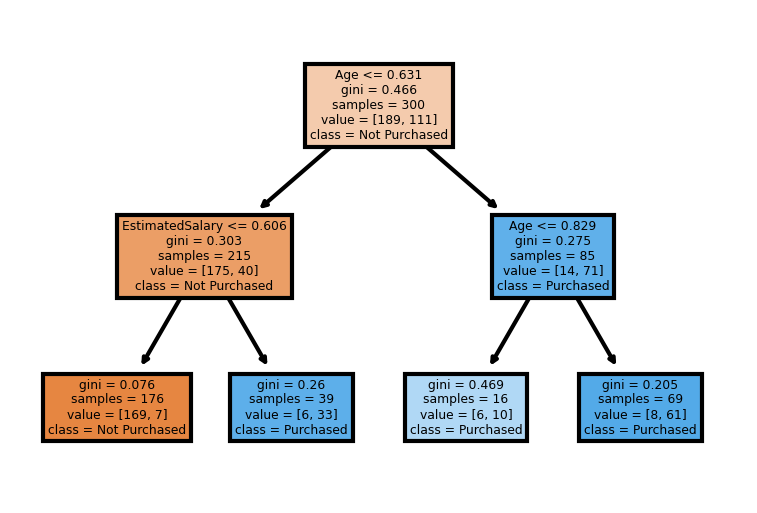

In [139]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
fn = dataset.columns[2:4]
cn = ['Not Purchased', 'Purchased']
plot_tree(classifier, feature_names = fn, class_names=cn, filled = True);

**Confusion Matrix**
<br>
Untuk mengetahui tingkat akurasi dari model yang sudah dibuat dapat dilakukan dengan menggunakan confusion matrix. Untuk memahami secara lebih mengenai confusion matriks, perhatikan gambar di bawah ini!
<br>
<br>
<img src=cm.jpg style="width:400px;height:220px"/>

In [140]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 2, 30]], dtype=int64)

***Receiver Operating Characteristic* (ROC) Curves**
<br>
ROC curve sering digunakan di dalam klasifikasi satu kelas di mana dia akan membuat kurva yang membandingkan antara *true positive rate* (Sensitiviy/Recall) dan *false positive rate* (1-Sensitivity)

Logistic: ROC AUC=0.939


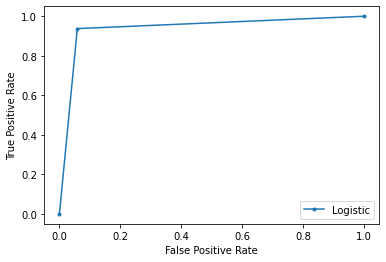

In [141]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

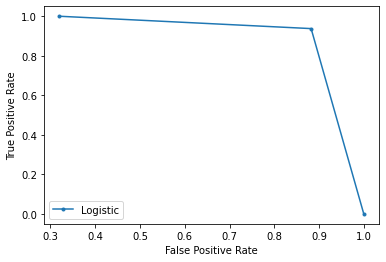

In [142]:
# roc curve and auc
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# calculate roc curves
lr_fpr, lr_tpr, _ = precision_recall_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### 2. Klasifikasi multi kelas
**Studi kasus: klasifikasi tulisan**
<br>
Di dalam studi kasus ini kita akan melakukan klasifikasi tulisan tangan yang bersifat multi kelas. Angka yang akan diklasifikasikan terdiri dari angka 0 sampai 9.

**Memanggil dataset**
<br>
Untuk melakukan klasifikasi kita akan menggunakan dataset yang banyak digunakan untuk mengklasifikasikan angka, yaitu dataset MNIST.

In [79]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [80]:
X, y = mnist['data'], mnist['target']

**Explorasi Data**
<br>
Tampilan nilai X dan y

In [81]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Tampilan nilai X dan y untuk array pertama. Masing-masing baris nilai X adalah array dengan panjang data sebanyak 1 x 728, yang dapat dibentuk menjadi gambar dengan pixel ukuran 28 x 28. Untuk mengubah array sepanjang 1 x 728 menjadi 28 x 28 kita dapat menggunakan fungsi .reshape(28,28)

In [92]:
# Panggil array pertama
X[0].reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [97]:
# Label dari nilai X[0] ada di dalam bentuk string karena ada ''
y[0]

'5'

In [94]:
# X terdiri dari 7000 contoh data 
X.shape

(70000, 784)

In [95]:
# y terdiri dari 7000 contoh data
y.shape

(70000,)

**Visualisasi Data**
<br>
Untuk melihat gambaran yang lebih jelas mengenai matriks X, kita akan melakukan plotting untuk mengubahnya menjadi angka.

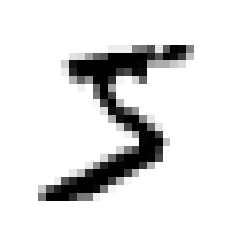

In [96]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

Ubah tipe data y dari string menjadi integer

In [98]:
import numpy as np
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

Lihat data unique dari setiap list array dengan menggunakan set(). Tidak bisa menggunakan unique karena khusus untuk dataframe saja penggunaannya

In [101]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

**Data latih & data uji**
<br>
Dengan asumsi pembagian nilai 0-9 merata pada X, maka sekarang kita akan membagi X dan y menjadi data latih dan data uji. Kita akan mengambil 6000 data untuk data latih dan 1000 data untuk data uji

In [102]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Model Machine Learning - Support Vector Classifier**
<br>
Support Vector Classifier (SVC) merupakan salah satu model machine learning yang banyak digunakan untuk menyelesaikan masalah klasifikasi. Sebenarnya SVC adalah algoritma yang dikhususkan untuk klasifikasi satu kelas. Untuk membuatnya dapat diaplikasikan untuk kasus klasifikasi multi kelas kita dapat menerapkan:

* *One-versus-the-rest* (OVR) strategy
    - **Cara kerja**: untuk kasus deteksi 10 kelas maka kita perlu membuat 10 buah model klasifikasi untuk masing-masing label (0,1,2,3,4,5,6,7,8,9)
    - **Kelebihan**: hanya perlu membuat 10 buah model klasifikasi
* *One-versus-one* (OvO) strategy
    - **Cara kerja**: untuk kasus deteksi 10 kelas maka kita perlu membuat 45 buah model klasifikasi untuk perbandingan antara 0-1, 0-2, .. 9-8. Rumus perhitungannya jika terdapat N kelas: N x N (N - 1) / 2
    - **Kelebihan**: setiap model hanya membandingkan 2 buah kelas saja
<br>
<br>
Penggunaan SVC pada library sklean.svm akan memilih strategi mana yang paling baik secara otomatis


In [107]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([X_test[0]])

array([7], dtype=uint8)

In [108]:
y_test[0]

7

In [109]:
scores = svm_clf.decision_function([X_test[0]])
scores

array([[ 3.80895496, -0.30212376,  6.19343167,  8.29375992,  1.71167996,
         4.76436748,  0.69153837,  9.31783975,  2.75699419,  7.28292338]])

In [113]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Confusion matrix**

In [115]:
y_pred = svm_clf.predict(X_test)
conf_mx = confusion_matrix(y_test, y_pred)

In [116]:
conf_mx

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  995,    0,    2,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]],
      dtype=int64)

Untuk mendapatkan gambaran yang lebih baik terkait confusion matrix di atas, kita bisa menggunakan plt.matshow()

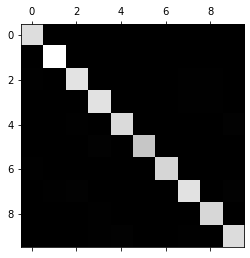

In [117]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Gambar di atas memberikan kita gambaran kalau model mampu menebak masing-masing kelas dengan baik. Namun jika kita ingin meneliti lebih jauh seberapa besar tingkat error, kita bisa lakukan dengan melakukan normalisasi dan melakukan pengulangan plot.

In [121]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

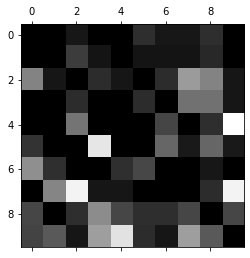

In [120]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## Kesimpulan
Dari materi pertemuan pada hari ini ada beberapa hal yang sudah kita pelajari, diantaranya:
1. Perbedaan **klasifikasi satu kelas dan multi kelas**
2. **Confusion matrix** sebagai metode untuk menguji performa metode klasifikasi
3. **ROC Curve** sebagai kurva untuk membandingkan antara *true positive rate* dan *true negative rate*
4. **Precision/Recall Curve** sebagai kurva untuk membandingkan antara Precision dan Recall
5. ***Area under curve* (AUC)** sebagai cara untuk menguji performa ROC dan Precision/Recall curve